# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

[Сразу к выводу](#section_id1)

<b> Импортируем нелобходимые библиотеки</b>

In [223]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

<b>Откроем наши файлы с данными<b/>

In [224]:
try:
    df1 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    df1 = pd.read_csv('geo_data_0.csv')

In [225]:
try:
    df2 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    df2 = pd.read_csv('geo_data_1.csv')

In [226]:
try:
    df3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df3 = pd.read_csv('geo_data_2.csv')

<b>Ознакомимся с содержимым наших файлов<b/>

In [227]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [228]:
dfs = [df1, df2, df3]
for df in dfs:
    print('Название датафрейма: ',get_df_name(df))
    display(df.info())
    display('Корреляция',df[['id', 'f0', 'f1', 'f2']].corr())
    display('Количество явных дубликтов:', df.duplicated().sum())
    print('-' * 100)

Название датафрейма:  df1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Корреляция'

,f0,f1,f2
f0,1.000000,-0.440723,-0.003153
f1,-0.440723,1.000000,0.001724
f2,-0.003153,0.001724,1.000000


'Количество явных дубликтов:'

0

----------------------------------------------------------------------------------------------------
Название датафрейма:  df2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Корреляция'

,f0,f1,f2
f0,1.000000,0.182287,-0.001777
f1,0.182287,1.000000,-0.002595
f2,-0.001777,-0.002595,1.000000


'Количество явных дубликтов:'

0

----------------------------------------------------------------------------------------------------
Название датафрейма:  df3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

'Корреляция'

,f0,f1,f2
f0,1.000000,0.000528,-0.000448
f1,0.000528,1.000000,0.000779
f2,-0.000448,0.000779,1.000000


'Количество явных дубликтов:'

0

----------------------------------------------------------------------------------------------------


Все таблицы имеют одинаковую структуру, не имеют нулевых значений.

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).


Явных дубликатов в таблицах не обнаружено.

В первом датафрейме наблюдается интересная отрицательная корреляция между 0 и 1 признаком. В остальных датафреймах корреляции несущественны.

In [229]:
def corr_heatmap(df):
    ax=sns.heatmap (df.corr(), cmap='Blues', annot=True)
    ax.set_title(get_df_name(df))

<div class="alert alert-block alert-info">

<b>Совет (ревью 2): </b> Надо добавить:
    
`import matplotlib.pyplot as plt
plt.show()`
</div>

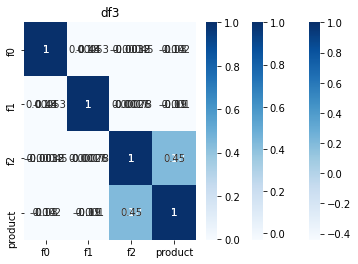

In [230]:
dfs = [df1, df2, df3]

for df in dfs:
    corr_heatmap(df)

sns.pairplot(df1, vars = ['id', 'f0', 'f1', 'f2'])

<AxesSubplot:>

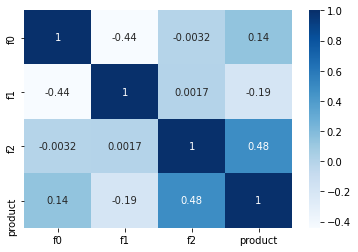

In [231]:
sns.heatmap (df1.corr(), cmap='Blues', annot=True)

<AxesSubplot:>

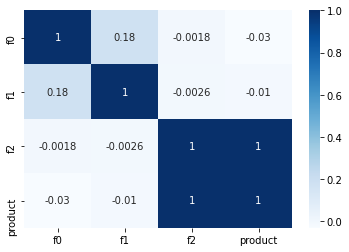

In [232]:
sns.heatmap (df2.corr(), cmap='Blues', annot=True)

<AxesSubplot:>

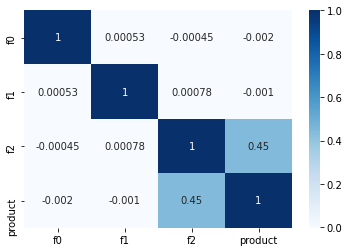

In [233]:
sns.heatmap (df3.corr(), cmap='Blues', annot=True)

В колонке с идентификатором никакой глубокой мысли нет. Ценности в масшабиировании её я не вижу, всё-таки это не какой-то категориальный признак, поэтому просто удалим её.

In [234]:
df1 = df1.drop(columns=['id'])
df2 = df2.drop(columns=['id'])
df3 = df3.drop(columns=['id'])

### Краткий вывод по первому шагу
<a id='section_id1'></a>

Ознакомившись с данными мы увидели многое в частности:

* Все таблицы имеют одинаковую структуру, а не имеют пустых значений;
* В каждой отдельно взятой таблице отсутсуют явные дубликаты;
* Анализ на корреляцию внутри данных выявил, что во втором и третьем датафрейме объектов с сильной корреляцией (положительной или отрицательной) нет. А вот в первом датафрейме наблюдается интересная взаимосвзять между первым и вторым признаком. То есть чем ниже один признак тем ниже второй. Суть этих признаков от нас скрыта, поэтому пока оставим их;
* В каждой таблице присутствует столбец с идентификатором скважины для построения нашей модели этот признак не нужен, поэтому мы его убрали. Мы бы его так и так убрали на моменте построения обучающей и валидационной выборки.


## Обучение и проверка модели

[Сразу к выводу](#section_id2)

Разобъём данные на обучающую и валидационную выборки в соотношении 75:25.

In [235]:
def tar_feat(df):
    target = df['product']
    features = df.drop('product', axis=1)
    return features, target

In [236]:
def train_valid(df):
    features,target = tar_feat(df)
    
    train_features, valid_features, train_target, valid_target = train_test_split(
    features, 
    target, 
    test_size=.75,                                                                           
    random_state=12345)
    
    return train_features, valid_features, train_target, valid_target

In [237]:
def model_tr_val(df):
    model = LinearRegression()
    features, target = tar_feat(df)
    train_features, valid_features, train_target, valid_target = train_valid(df)
    
    model.fit(train_features, train_target)
    predict = model.predict(valid_features)
    rmse = mean_squared_error(valid_target, predict) ** 0.5
    predict_mean = 'Средний запас сырья по датафрейму в предсказаниях:', predict.mean()
    rmse_total = 'RMSE региона:' + str(rmse) 
    return predict_mean, rmse_total

In [238]:
model_tr_val(df1)

(('Средний запас сырья по датафрейму в предсказаниях:', 92.56773277214636),
 'RMSE региона:37.70188872577138')

In [239]:
model_tr_val(df2)

(('Средний запас сырья по датафрейму в предсказаниях:', 68.81242584773999),
 'RMSE региона:0.8914237412897416')

In [240]:
model_tr_val(df3)

(('Средний запас сырья по датафрейму в предсказаниях:', 94.94516837037592),
 'RMSE региона:40.03777476932527')

* Обучим модель и сделаем предсказания на валидационной выборке;

* Сохраним предсказания и правильные ответы на валидационной выборке;

* Напечатаем на экране средний запас предсказанного сырья и RMSE модели.

<B>Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).</B>

### Краткий вывод по второму шагу.
<a id='section_id2'></a>

На втором шаге мы сделали:

* Разделили для каждого датафрейма выборки на обучающую и валидную в соотношении 1 к 4.
* Обучили модель линейной регрессии для каждого датафрейма на обучающей выборке и предсказали на валидной;
* Посчитали среднеквадратичную ошибку для каждого. Для второго региона получили очень низкую ошибку. Можно сделать вывод, данные в этои дф самые репрезентативные и "полезные" для обечения и предсказания модели. 

## Подготовка к расчёту прибыли

[Сразу к выводу](#section_id3)

_условия задачи_
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.


* Все ключевые значения для расчётов сохраним в отдельных переменных.
* Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе


In [247]:
# общий бюджет
BUDGET = 10000
# бюджет скважины
WELL_BUDGET = BUDGET/0.45
# достаточный объём сырья для безубыточной разработки новой скважины
BREAK_EVEN = WELL_BUDGET / 200
BREAK_EVEN

111.11111111111111

То есть для самоокупаемости средний запас на скажину должен быть чуть более 111 тыс. баррелей - у всех 3-х регионов предсказанный запас ниже безубыточного.

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [248]:
def profit(target, predictions):
    # Выбираем топовые предсказания
    preds_sorted  = predictions.sort_values(ascending=False)
    # Суммируем соответствующие топ-200 реальные значения, считаем выручку и вычитаем бюджетные расходы
    selected = target[preds_sorted.index][:200].sum()
    return selected * 0.45 - BUDGET

### Краткий вывод по третьему шагу
<a id='section_id3'></a>

* Мы рассчитали достаточный достаточный объем сырья для безубыточной разработки новой скважины, для этого у нас выбраны 200 точек для разработки, и на эти точки 10 млрд рублей. В результате расчётов мы получили <b>цифру безубыточности 111 тыс.баррелей</b>. По итогу, по всем предсказанным моделям никто из них эту черту не пересечёт.
* Также мы написали функцию для расчёта прибыли по выбранным скважинам и предсаказаниям модели

## Расчёт прибыли и рисков 

[Сразу к выводу](#section_id4)

* Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
* Найдём среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [249]:
def bootstrap(df):
    model = LinearRegression()
    features, target = tar_feat(df)
    train_features, valid_features, train_target, valid_target = train_valid(df)
    
    model.fit(train_features, train_target)
    state = RandomState(12345)
    predict = model.predict(valid_features)
    predict = pd.Series(predict)
    valid_target.reset_index(drop=True, inplace=True)
    values = []
    for i in range(1000):
        target_subsample = valid_target.sample(
            n = 500, 
            replace = True, 
            random_state=state)
        predict_sample = predict[target_subsample.index]

        values.append(profit(target_subsample,predict_sample))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975) 
    risk = (values < 0).mean()
    mean = values.mean() 
        
    return  f'Средняя выручка: {mean}',  f'-2,5%-квантиль: {lower}' , f'+2,5%-квантиль: {upper}' ,f'Риск: {risk:.2%}',f'Размах интервала:{(upper-lower)}'

In [250]:
bootstrap(df1)

('Средняя выручка: 444.48140534475226',
 '-2,5%-квантиль: -80.99876718613217',
 '+2,5%-квантиль: 935.3768100621168',
 'Риск: 4.80%',
 'Размах интервала:1016.3755772482489')

In [251]:
bootstrap(df2)

('Средняя выручка: 477.01901392440857',
 '-2,5%-квантиль: 43.94819723158603',
 '+2,5%-квантиль: 928.8123535942925',
 'Риск: 1.20%',
 'Размах интервала:884.8641563627065')

In [252]:
bootstrap(df3)

('Средняя выручка: 385.9155321056723',
 '-2,5%-квантиль: -122.44020484745636',
 '+2,5%-квантиль: 874.8417830900089',
 'Риск: 7.00%',
 'Размах интервала:997.2819879374653')

### Краткий вывод по четвертому шагу
<a id='section_id4'></a>

* Применив технику Bootstrap с 1000 выборок мы нашли среднюю прибыль, 95%-й доверительный интервал и риск убытков  
* <b> По результатам лучше всех себя показал второй регион. У него (по сравнению с другмими) наименьший доверительный интервал, но также и самый маленьких риск.</b> К слову когда мы обучали модель линейной регрессии лучший результат также был у второго региона. Причём запасов сырья у них (по предскзанию) меньше всего. Подозреваю, что это связано, но как именно пока не могу осознать.